In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, sys
from PIL import Image
from scipy.misc import imread
import glob

%matplotlib inline

In [84]:
# IMAGE MANIPULATION FUNCTIONS
def clamp (n, minn, maxn):
    return max(min(maxn, n[i]), minn)

def clamp_arr(n, minn, maxn):
    for i in xrange(len(n)):
        n[i] = max(min(maxn, n[i]), minn)
    return n

def crop_img(img, start_y=0, start_x=0):
    # Remove negative vals
    start_y = 0 if start_y < 0 else start_y
    start_x = 0 if start_x < 0 else start_x 
    
    # Remove overflows
    start_y = img.shape[0] - IMAGE_SIZE - 1 if start_y+IMAGE_SIZE >= img.shape[0] else start_y
    start_x = img.shape[1] - IMAGE_SIZE - 1 if start_x+IMAGE_SIZE >= img.shape[1] else start_x 
    
    return img[start_y:(start_y+IMAGE_SIZE), start_x:(start_x+IMAGE_SIZE)]

def transform_img(img, rot=0, lr=0, ud=0):
    img = np.rot90(img, rot)
    if lr == 1: img = np.fliplr(img)
    if ud == 1: img = np.flipud(img)
    return img

def adjust_gamma(img, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def adjust_hsv(img, h=0, s=0, v=0):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for x in range(0, len(hsv)):
        for y in range(0, len(hsv[0])):
            hsv[x, y][2] = hsv[x, y][2]-v if hsv[x, y][2]>v else 0  
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

def add_noise(img, mu=0,sig=1):
    for x in range(0, len(img)):
        for y in range(0, len(img[0])):
            noise = np.random.normal(mu,sig,3)
            img[x,y][0] = clamp(img[x,y][0] + noise[0],0,255)
            img[x,y][1] = clamp(img[x,y][1] + noise[1],0,255)
            img[x,y][2] = clamp(img[x,y][2] + noise[2],0,255)
    return img

[17, 0, 255]

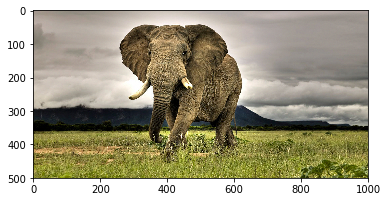

In [78]:
img=imread('./test-img.jpg')
img = add_noise(img)
plt.imshow(img)

In [77]:
# HYPERPARAMETERS
DATABASE_DIR = "./"
DATABASE_SIZE = 1
    
# IMAGE KERNEL DESCRIPTORS
IMAGE_SIZE = 32
NUM_CHANNELS = 3

ground_database     = []
noisy_database      = []
dark_noisy_database = []

# Load all images in database
for filename in glob.glob(DATABASE_DIR+"*.jpg"): #assuming jpg
    im=imread(filename)
    ground_database.append(im)


NameError: name 'image_list' is not defined

In [12]:
np.random.uniform(-1,1,(5,5,3))

array([[[ 0.78172373, -0.47423834,  0.859894  ],
        [ 0.94755218, -0.98360728, -0.0819707 ],
        [ 0.37960913,  0.10886012,  0.02646837],
        [ 0.10197847, -0.58156113,  0.33846886],
        [-0.58739263, -0.58914322, -0.72442364]],

       [[-0.55343204, -0.80260517,  0.18953984],
        [ 0.57516813,  0.21293409, -0.99867528],
        [-0.55584164,  0.36559788, -0.2921646 ],
        [ 0.36319223,  0.92028252,  0.8825066 ],
        [-0.99677116, -0.21109468,  0.70562434]],

       [[-0.82709277, -0.08426084, -0.27594502],
        [ 0.36712885, -0.41192013,  0.65062726],
        [ 0.38556829,  0.73164434,  0.14659721],
        [ 0.61576202, -0.52756297,  0.96312831],
        [-0.59635307, -0.98991463,  0.17261201]],

       [[-0.32938828, -0.32937203, -0.61094605],
        [ 0.29534926, -0.0509216 , -0.30845288],
        [-0.11597725,  0.47759697,  0.99607509],
        [-0.30633344, -0.84598801,  0.69195451],
        [-0.56996672,  0.39996303,  0.13925193]],

       [[-0.

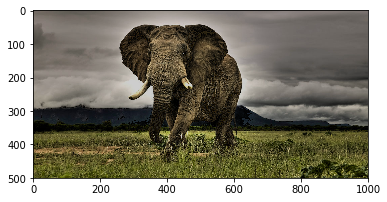

In [114]:
plt.imshow(img)

In [44]:
full_img_arr.shape

(500, 1000, 3)